In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.svm as svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [45]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [46]:
# dataset 작업요
df = pd.read_csv('../EDA/s_data.csv')
df.head(2)

,TARGET,자녀 수,가족 구성원 수,나이,가입연수,월간 수입,성별,차량 소유 여부,부동산 소유 여부,수입 유형,최종 학력,결혼 여부,주거 형태,휴대전화 소유 여부,이메일 소유 여부,직업,산업군,도시구분
0,0,2,4.0,39,23.0,1504500.0,1,1,1,3,0,0,3,1,0,1,5,1
1,0,0,2.0,45,16.0,4956000.0,0,1,0,1,1,0,3,1,0,4,16,2


In [47]:
# 조건 설정
conditions = [
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 0),
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 1),
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 2),
(df['부동산 소유 여부'] == 0) & (df['주거 형태'] == 3),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 0),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 1),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 2),
(df['부동산 소유 여부'] == 1) & (df['주거 형태'] == 3),
]
# 할당할 값 설정
values = [0,1, 2, 3, 4, 5, 6, 7]
# np.select를 사용하여 조건에 맞는 값을 'y' 컬럼에 할당
df['home_shape'] = np.select(conditions, values, default=0)

In [48]:
# 조건 설정
conditions = [
(df['차량 소유 여부'] == 0) & (df['부동산 소유 여부'] == 0),
(df['차량 소유 여부'] == 0) & (df['부동산 소유 여부'] == 1),
(df['차량 소유 여부'] == 1) & (df['부동산 소유 여부'] == 0),
(df['차량 소유 여부'] == 1) & (df['부동산 소유 여부'] == 1)
]
# 할당할 값 설정
values = [0,1,2,3]
# np.select를 사용하여 조건에 맞는 값을 'y' 컬럼에 할당
df['car_home'] = np.select(conditions, values, default=0)

In [49]:
df['가입연수'].value_counts().sort_index()
# 가입연수 = 5년 미만 0, 5~20년은 1, 20~41년은 2, 41년 이상 3

가입연수
0.0     3222
1.0     3025
2.0     2979
3.0     2531
4.0     2215
5.0     1942
6.0     2180
7.0     2269
8.0     2186
9.0     1977
10.0    2084
11.0    2408
12.0    2471
13.0    2352
14.0    1938
15.0    1671
16.0    1704
17.0    1665
18.0    1556
19.0    1529
20.0    1434
21.0    1464
22.0    1472
23.0    1449
24.0    1376
25.0    1250
26.0    1155
27.0    1042
28.0     861
29.0     700
30.0     584
31.0     546
32.0     466
33.0     422
34.0     384
35.0     344
36.0     284
37.0     210
38.0     177
39.0     125
40.0      93
41.0      65
42.0      50
43.0      41
44.0      28
45.0      17
46.0      15
47.0       8
48.0       5
49.0       5
50.0       2
52.0       2
56.0       4
57.0       2
58.0       2
Name: count, dtype: int64

In [50]:
df['가족 구성원 수'].value_counts().sort_index()

가족 구성원 수
1.0    12938
2.0    31311
3.0    10138
4.0     4837
5.0      659
6.0       82
7.0       17
8.0        5
9.0        1
Name: count, dtype: int64

In [51]:
df['가족크기범주'] = pd.cut(df['가족 구성원 수'], bins=[0, 2, 4,float('inf')],  
                    labels=['0','1', '2'])

In [52]:
df['가족크기범주'].value_counts()

# 0 : 가족구성원수 1~2명
# 1 : 가족구성원수 3~4명
# 2 : 가종구성원수 5명 이상

가족크기범주
0    44249
1    14975
2      764
Name: count, dtype: int64

In [53]:
# 데이터타입 category -> int 변경 
df['가족크기범주'] = df['가족크기범주'].dropna().astype(int)

In [54]:
# 조건 설정
conditions = [
(df['가족크기범주'] == 0) & (df['가입연수'] == 0),
(df['가족크기범주'] == 0) & (df['가입연수'] == 1),
(df['가족크기범주'] == 0) & (df['가입연수'] == 2),
(df['가족크기범주'] == 0) & (df['가입연수'] == 3),

(df['가족크기범주'] == 1) & (df['가입연수'] == 0),
(df['가족크기범주'] == 1) & (df['가입연수'] == 1),
(df['가족크기범주'] == 1) & (df['가입연수'] == 2),
(df['가족크기범주'] == 1) & (df['가입연수'] == 3),


(df['가족크기범주'] == 2) & (df['가입연수'] == 0),
(df['가족크기범주'] == 2) & (df['가입연수'] == 1),
(df['가족크기범주'] == 2) & (df['가입연수'] == 2),
(df['가족크기범주'] == 2) & (df['가입연수'] == 3),
]
# 할당할 값 설정
values = [0, 1, 2, 3, 4, 5, 6, 7, 8,9,10,11]

# np.select를 사용하여 조건에 맞는 값을 'y' 컬럼에 할당
df['combinedFY'] = np.select(conditions, values, default=0)
#df = df.drop(['차량 소유 여부', '부동산 소유 여부', '주거 형태'], axis=1)
df.head(2)

,TARGET,자녀 수,가족 구성원 수,나이,가입연수,월간 수입,성별,차량 소유 여부,부동산 소유 여부,수입 유형,...,주거 형태,휴대전화 소유 여부,이메일 소유 여부,직업,산업군,도시구분,home_shape,car_home,가족크기범주,combinedFY
0,0,2,4.0,39,23.0,1504500.0,1,1,1,3,...,3,1,0,1,5,1,7,3,1,0
1,0,0,2.0,45,16.0,4956000.0,0,1,0,1,...,3,1,0,4,16,2,3,2,0,0


In [55]:
# 파생변수 'age_income' 생성
# 임금수준 & 나이활용한 파생변수
conditions1 = [
(df['나이'] == 0) & (df['월간 수입'] == 0),
(df['나이'] == 0) & (df['월간 수입'] == 1),
(df['나이'] == 0) & (df['월간 수입'] == 2),
(df['나이'] == 0) & (df['월간 수입'] == 3),

(df['나이'] == 1) & (df['월간 수입'] == 0),
(df['나이'] == 1) & (df['월간 수입'] == 1),
(df['나이'] == 1) & (df['월간 수입'] == 2),
(df['나이'] == 1) & (df['월간 수입'] == 3),

(df['나이'] == 2) & (df['월간 수입'] == 0),
(df['나이'] == 2) & (df['월간 수입'] == 1),
(df['나이'] == 2) & (df['월간 수입'] == 2),
(df['나이'] == 2) & (df['월간 수입'] == 3),

(df['나이'] == 3) & (df['월간 수입'] == 0),
(df['나이'] == 3) & (df['월간 수입'] == 1),
(df['나이'] == 3) & (df['월간 수입'] == 2),
(df['나이'] == 3) & (df['월간 수입'] == 3),

(df['나이'] == 4) & (df['월간 수입'] == 0),
(df['나이'] == 4) & (df['월간 수입'] == 1),
(df['나이'] == 4) & (df['월간 수입'] == 2),
(df['나이'] == 4) & (df['월간 수입'] == 3),

]
# 할당할 값 설정
values = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
# np.select를 사용하여 조건에 맞는 값을 'y' 컬럼에 할당
df['age_income'] = np.select(conditions1, values, default=0)
df.head(2)

,TARGET,자녀 수,가족 구성원 수,나이,가입연수,월간 수입,성별,차량 소유 여부,부동산 소유 여부,수입 유형,...,휴대전화 소유 여부,이메일 소유 여부,직업,산업군,도시구분,home_shape,car_home,가족크기범주,combinedFY,age_income
0,0,2,4.0,39,23.0,1504500.0,1,1,1,3,...,1,0,1,5,1,7,3,1,0,0
1,0,0,2.0,45,16.0,4956000.0,0,1,0,1,...,1,0,4,16,2,3,2,0,0,0


In [56]:
# 산업군_직업 컬럼 생성 함수
def create_job_column(df, ind_value, job_value):

#    새로운 컬럼을 생성하고 특정 조건에 따라 값을 할당하는 함수

#    Parameters:
#    - df: 데이터프레임
#    - job_value: 직업 구분코드
#    - ind_value : 산업군 구분코드

#    Returns:
#    - df: 새로운 컬럼을 추가한 데이터프레임
  
  # 특정 숫자에 대응하는 문자열 매핑
  ind_mapping = {8: 'rest', 0: 'cons', 24: 'bus'}
  job_mapping = {15: 'low', 12: 'drv', 17: 'sec', 5: 'lab'}

  # 특정 숫자에 해당하는 문자열 매핑 적용
  ind_str = ind_mapping.get(ind_value, f"default_{ind_value}")
  job_str = job_mapping.get(job_value, f"default_{job_value}")

  new_column_name = f"{ind_str}_{job_str}"
  # 조건에 맞는 행에 1을 할당하여 새로운 컬럼에 추가
  df[new_column_name] = (df['산업군'] == ind_value) & (df['직업'] == job_value)
  # True/False를 1/0으로 변환
  df[new_column_name] = df[new_column_name].astype(int)
    
  return df
# 함수 사용 예시
# create_job_column(your_df, ind_value, job_value)

In [57]:
# 산업군 8_직업 컬럼 생성
create_job_column(df, 8, 15)
create_job_column(df, 8, 12)
create_job_column(df, 8, 17)
create_job_column(df, 8, 5)

,TARGET,자녀 수,가족 구성원 수,나이,가입연수,월간 수입,성별,차량 소유 여부,부동산 소유 여부,수입 유형,...,도시구분,home_shape,car_home,가족크기범주,combinedFY,age_income,rest_low,rest_drv,rest_sec,rest_lab
0,0,2,4.0,39,23.0,1504500.0,1,1,1,3,...,1,7,3,1,0,0,0,0,0,0
1,0,0,2.0,45,16.0,4956000.0,0,1,0,1,...,2,3,2,0,0,0,0,0,0,0
2,0,0,2.0,32,9.0,2478000.0,1,0,1,1,...,2,7,1,0,0,0,0,0,0,0
3,0,1,3.0,34,12.0,3186000.0,1,1,0,2,...,1,3,2,1,0,0,0,0,0,0
4,0,0,2.0,38,4.0,2212500.0,1,0,1,1,...,3,7,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59983,0,0,1.0,60,29.0,1327500.0,1,0,1,3,...,2,7,1,0,0,0,0,0,0,0
59984,1,0,2.0,42,1.0,4425000.0,0,1,1,1,...,2,7,3,0,1,0,0,0,0,0
59985,1,0,1.0,26,7.0,3982500.0,1,0,0,1,...,2,3,0,0,0,0,0,0,0,0
59986,0,0,1.0,50,16.0,2478000.0,1,1,1,1,...,2,7,3,0,0,0,0,0,0,0


In [58]:
# 산업군 0_직업 컬럼 생성
create_job_column(df, 0, 15)
create_job_column(df, 0, 12)
create_job_column(df, 0, 17)
create_job_column(df, 0, 5)

,TARGET,자녀 수,가족 구성원 수,나이,가입연수,월간 수입,성별,차량 소유 여부,부동산 소유 여부,수입 유형,...,combinedFY,age_income,rest_low,rest_drv,rest_sec,rest_lab,cons_low,cons_drv,cons_sec,cons_lab
0,0,2,4.0,39,23.0,1504500.0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2.0,45,16.0,4956000.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,32,9.0,2478000.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,3.0,34,12.0,3186000.0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,38,4.0,2212500.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59983,0,0,1.0,60,29.0,1327500.0,1,0,1,3,...,0,0,0,0,0,0,0,0,0,0
59984,1,0,2.0,42,1.0,4425000.0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
59985,1,0,1.0,26,7.0,3982500.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59986,0,0,1.0,50,16.0,2478000.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# 산업군 24_직업 컬럼 생성
create_job_column(df, 24, 15)
create_job_column(df, 24, 12)
create_job_column(df, 24, 17)
create_job_column(df, 24, 5)

,TARGET,자녀 수,가족 구성원 수,나이,가입연수,월간 수입,성별,차량 소유 여부,부동산 소유 여부,수입 유형,...,rest_sec,rest_lab,cons_low,cons_drv,cons_sec,cons_lab,bus_low,bus_drv,bus_sec,bus_lab
0,0,2,4.0,39,23.0,1504500.0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2.0,45,16.0,4956000.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,32,9.0,2478000.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,3.0,34,12.0,3186000.0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,38,4.0,2212500.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59983,0,0,1.0,60,29.0,1327500.0,1,0,1,3,...,0,0,0,0,0,0,0,0,0,0
59984,1,0,2.0,42,1.0,4425000.0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
59985,1,0,1.0,26,7.0,3982500.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59986,0,0,1.0,50,16.0,2478000.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.columns

Index(['TARGET', '자녀 수', '가족 구성원 수', '나이', '가입연수', '월간 수입', '성별', '차량 소유 여부',
       '부동산 소유 여부', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '휴대전화 소유 여부',
       '이메일 소유 여부', '직업', '산업군', '도시구분', 'home_shape', 'car_home', '가족크기범주',
       'combinedFY', 'age_income', 'rest_low', 'rest_drv', 'rest_sec',
       'rest_lab', 'cons_low', 'cons_drv', 'cons_sec', 'cons_lab', 'bus_low',
       'bus_drv', 'bus_sec', 'bus_lab'],
      dtype='object')

In [ ]:
df.to_csv('final_datasets.csv')

In [ ]:
df.columns

In [61]:
from scipy.stats import chi2_contingency
chi2_results = {}
categorical_features = ['도시구분', 'home_shape', 'car_home', '가족크기범주',
       'combinedFY', 'age_income', 'rest_low', 'rest_drv', 'rest_sec',
       'rest_lab', 'cons_low', 'cons_drv', 'cons_sec', 'cons_lab', 'bus_low',
       'bus_drv', 'bus_sec', 'bus_lab']

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['TARGET'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    chi2_results[feature] = {'chi2': chi2, 'p-value': p}


chi2_results

{'도시구분': {'chi2': 37.76910009670921, 'p-value': 3.1631938880082255e-08},
 'home_shape': {'chi2': 45.192701639308765, 'p-value': 1.2547164752927197e-07},
 'car_home': {'chi2': 23.424189579390976, 'p-value': 3.2942092839304736e-05},
 '가족크기범주': {'chi2': 38.68918157078579, 'p-value': 3.969638575164914e-09},
 'combinedFY': {'chi2': 55.32066023040111, 'p-value': 6.76982987953611e-08},
 'age_income': {'chi2': 0.0, 'p-value': 1.0},
 'rest_low': {'chi2': 0.11113879864845122, 'p-value': 0.7388513360964043},
 'rest_drv': {'chi2': 3.3207511959239444e-09, 'p-value': 0.9999540211367246},
 'rest_sec': {'chi2': 1.3519958141890516, 'p-value': 0.24492950873405958},
 'rest_lab': {'chi2': 2.1829174888429033, 'p-value': 0.13954970439666747},
 'cons_low': {'chi2': 7.469813510470613, 'p-value': 0.006274205028016489},
 'cons_drv': {'chi2': 0.43248322735712985, 'p-value': 0.5107729753332099},
 'cons_sec': {'chi2': 0.40353498759760686, 'p-value': 0.5252692658331212},
 'cons_lab': {'chi2': 56.32253869408649, 'p-

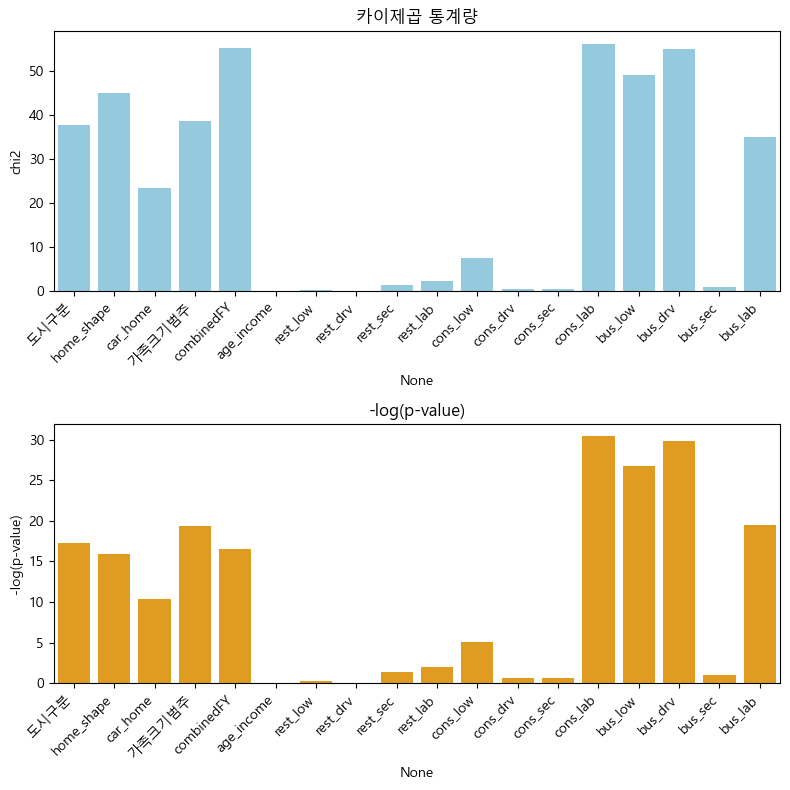

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 카이제곱 통계량과 p-value를 DataFrame으로 변환
result_df = pd.DataFrame(chi2_results).T

# p-value를 -log로 변환하여 DataFrame에 추가
result_df['-log(p-value)'] = -np.log(result_df['p-value'])

# 시각화 - 서브플롯 활용
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Chi2 Statistic 그래프
sns.barplot(x=result_df.index, y='chi2', data=result_df, color='skyblue', ax=axes[0])
axes[0].set_title('카이제곱 통계량')
axes[0].set_xticklabels(result_df.index, rotation=45, ha='right')  # x축 레이블 표시

# -log(p-value) 그래프
sns.barplot(x=result_df.index, y='-log(p-value)', data=result_df, color='orange', ax=axes[1])
axes[1].set_title('-log(p-value)')
axes[1].set_xticklabels(result_df.index, rotation=45, ha='right')  # x축 레이블 표시

plt.tight_layout()
plt.show()



In [ ]:
df.drop(['age_income','rest_low','rest_drv','rest_sec','rest_lab','cons_drv','cons_sec','bus_sec'], axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
df.to_csv('final_datasets.csv')

In [ ]:
import matplotlib.pyplot as plt

# 각 변수에 대한 p-value 추출
p_values = [result['p-value'] for result in chi2_results.values()]

# 변수명을 x축으로, p-value를 y축으로 하는 막대 그래프 생성
plt.bar(categorical_features, p_values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Categorical Features')
plt.ylabel('p-value')
plt.title('Chi-Square Test p-values for Categorical Features')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# chi2_results에서 p-value 추출
p_values = [result['p-value'] for result in chi2_results.values()]

# 변수명과 p-value를 데이터프레임으로 변환
heatmap_data = pd.DataFrame({'Variable': categorical_features, 'p-value': p_values})

# 히트맵 생성
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data.pivot_table(index='Variable', values='p-value').T, cmap="YlGnBu", annot=True, fmt=".3f", linewidths=.5)
plt.title('Chi-Square Test p-values for Categorical Features')
plt.show()


In [ ]:
df.corr()

In [ ]:
fig, ax = plt.subplots() 
fig.set_size_inches(30,15)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15);